# Prepare datasets

### Installing and loading libraries

In [11]:
import os
import pandas as pd
import sys
import re
import json
import librosa
import librosa.display
from IPython.display import Audio
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import glob
from pandas.core.common import flatten
import shutil
import pickle
import seaborn as sns

### Setting constants

Setting project, input and output folders.

In [30]:
wd = os.getcwd()
DATA = os.path.join(os.path.sep, str(Path(wd).parents[0]), "data", "processed")
FIGURES = os.path.join(os.path.sep, str(Path(wd).parents[0]), "reports", "figures")
DF = os.path.join(os.path.sep, DATA, "meerkat_full_specs.pkl")

## Processing files

Reading in labelfile

In [31]:
df = pd.read_pickle(DF)

In [14]:
df

,Name,Start,Duration,Time Format,Type,Description,start_s,duration_s,stop_s,date,...,raw_audio,spectrograms,denoised_spectrograms,stretched_spectrograms,stretched_denoised_spectrograms,stretched_mfccs,mfccs,zmfccs,freq_spectrograms,ampli_spectrograms
0,CCX,1:00:06.330,0:00.138,decimal,Cue,NaN,3606.330,0.138,3606.468,2017-08-23,...,"[0.07421875, -0.0390625, 0.046875, -0.04882812...","[[-17.126005, -17.478065, -18.361465, -18.6122...","[[12.465506, 13.172077, 15.100151, 18.702147, ...","[[-17.091763, -17.201288, -17.301771, -17.3925...","[[12.4655075, 12.577885, 12.783957, 13.024706,...","[[-185.60631, -186.9563, -188.32121, -189.7049...","[[-185.82288, -190.79483, -206.11852, -224.361...","[[0.64984345, 0.0813487, -1.670769, -3.7566311...","[[-9.4241905, -10.012363, -11.753595, -16.4784...","[[1.9310296, 1.8045973, 1.4767897, 0.85718805,..."
1,CC,1:00:15.043,0:00.083,decimal,Cue,NaN,3615.043,0.083,3615.126,2017-08-23,...,"[0.00390625, -0.009765625, -0.005859375, -0.00...","[[-4.711441, -5.041479, -4.9103146, -4.332323,...","[[19.45323, 19.491451, 20.794704, 22.801003, 2...","[[-4.7003555, -4.754673, -4.8091774, -4.863870...","[[19.45323, 19.338696, 19.290312, 19.339138, 1...","[[-150.67801, -151.27452, -151.76613, -152.187...","[[-150.74812, -153.35846, -158.54785, -159.267...","[[-1.5349202, -1.8745539, -2.5497582, -2.64339...","[[0.0, -0.09533405, -0.80149007, -2.549852, -4...","[[1.6543101, 1.6362522, 1.50849, 1.2334579, 0...."
2,CC,1:00:35.627,0:00.191,decimal,Cue,NaN,3635.627,0.191,3635.818,2017-08-23,...,"[-0.021484375, -0.01953125, -0.015625, -0.0253...","[[-2.0994568, -2.1183338, -2.4481869, -2.52930...","[[26.603214, 23.59336, 22.140139, 22.74288, 25...","[[-2.0606213, -2.0682697, -2.0753784, -2.12830...","[[26.603214, 25.222303, 24.038933, 23.166643, ...","[[-181.93117, -178.50516, -174.7108, -170.6093...","[[-182.17676, -172.59605, -161.6688, -155.9510...","[[-2.5395038, -1.3634436, -0.022088198, 0.6797...","[[-1.0441284, -1.0946293, -1.0754423, -0.78855...","[[2.7437742, 2.7278676, 2.7339003, 2.8257058, ..."
3,CCX,1:00:39.664,0:00.136,decimal,Cue,NaN,3639.664,0.136,3639.800,2017-08-23,...,"[-0.07421875, -0.091796875, -0.0703125, -0.093...","[[-2.4227839, -2.4676123, -1.3817182, -9.53674...","[[23.318436, 20.742912, 18.633371, 18.164673, ...","[[-2.4120007, -2.476612, -2.5023413, -2.488493...","[[23.318434, 22.743534, 21.944828, 21.31356, 2...","[[-154.5513, -150.79512, -146.91171, -143.0723...","[[-154.6195, -140.60776, -124.37303, -115.0430...","[[2.0452976, 3.630285, 5.4667325, 6.5221295, 7...","[[-27.228294, -16.333782, -5.389242, -1.448949...","[[0.2154943, 0.755373, 2.663106, 4.191824, 4.8..."
4,CCX,1:00:47.877,0:00.245,decimal,Cue,NaN,3647.877,0.245,3648.122,2017-08-23,...,"[0.01171875, 0.009765625, 0.015625, 0.015625, ...","[[-5.4007053, -4.486309, -2.7787685, -1.670370...","[[23.325747, 20.218807, 19.160906, 20.009195, ...","[[-5.3896008, -4.9296455, -4.492592, -3.631031...","[[23.325747, 21.436737, 20.242142, 19.67776, 1...","[[-169.82608, -158.66393, -148.64128, -139.718...","[[-169.8963, -148.33084, -131.75185, -129.3352...","[[-7.9856367, -4.902093, -2.5315387, -2.186000...","[[-2.652066, -2.3365288, -1.7130461, -1.354436...","[[1.4038293, 1.4557647, 1.5641029, 1.6300306, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34950,SN,12:51.564,0:00.068,decimal,Cue,NaN,771.564,0.068,771.632,2017-08-25,...,"[0.0023468733, 0.0020455122, 0.0016012192, 0.0...","[[-38.084805, -30.097816, -22.465376, -17.8102...","[[4.691105, 12.5629425, 20.171873, 24.800337, ...","[[-38.03222, -36.853714, -35.597187, -34.37663...","[[4.6911087, 6.0039177, 7.320339, 8.4627495, 9...","[[-274.09872, -271.28076, -269.03833, -267.125...","[[-274.4313, -261.09323, -253.72101, -248.9891...","[[-3.0215883, -1.9987001, -1.4333298, -1.07044...","[[-28.700651, -23.888939, -16.93663, -12.18484...","[[0.37727737, 0.65651757, 1.461712, 2.5261028,..."
34951,CC,12:52.519,0:00.177,decimal,Cue,NaN,772.519,

### Clean dataset 

#### Removing unsure, uncertain, hybrid calls etc)

In [35]:
print("Full: ", df.shape)
df = df.loc[df['unsure_call']==0]
print("Removed unsure: ", df.shape)
df = df.loc[df['certain_yn']=="y"]
print("Removed uncertain: ",df.shape)
df = df.loc[df['nonfocal_yn']=="n"]
print("Removed nonfocal: ",df.shape)
df = df.loc[df['noisy']==0]
print("Removed noisy: ",df.shape)
df = df.loc[df.call_lable != 'fu/hyb',:]
print("Removed hybrids: ",df.shape)

Full:  (34955, 34)
Removed unsure:  (34776, 34)
Removed uncertain:  (34058, 34)
Removed nonfocal:  (26226, 34)
Removed noisy:  (23187, 34)
Removed hybrids:  (22141, 34)


#### Removing extremely short and extremely long calls

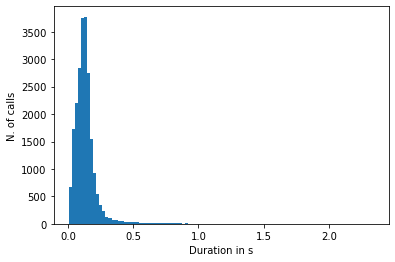

In [36]:
n, bins, pathes = plt.hist(df['duration_s'], bins=100)
plt.xlabel("Duration in s")
plt.ylabel("N. of calls")
plt.savefig(os.path.join(os.path.sep,FIGURES,'duration_hist.png'))

In [37]:
MAX_DURATION = 0.5
MIN_DURATION = 0.05

In [38]:
print(df[df['duration_s']>MAX_DURATION].shape[0]/df.shape[0])
print(df[df['duration_s']>MAX_DURATION].shape[0])

df = df.loc[df['duration_s'] <= MAX_DURATION]
df.shape

0.01273655209791789
282


(21859, 34)

In [39]:
print(df[df['duration_s']<MIN_DURATION].shape[0]/df.shape[0]) # % of calls < 0.5s --> 9.4 %
print(df[df['duration_s']<MIN_DURATION].shape[0])

df = df.loc[df['duration_s'] >= MIN_DURATION]
df.shape

0.09776293517544261
2137


(19722, 34)

### Inspect class frequencies

Saved as:  /home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/labelcounts_full.png


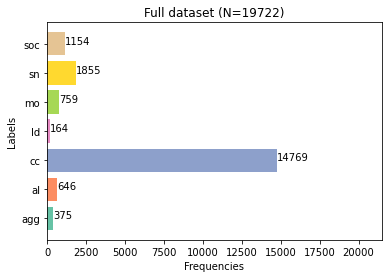

In [40]:
dftype='full'

labelcounts = pd.DataFrame(df['call_lable'].value_counts())
labelcounts.sort_index(inplace=True)
pal = sns.color_palette("Set2", n_colors=len(labelcounts.index))
plt.barh(labelcounts.index, labelcounts.call_lable.values, color = pal)

for index, value in enumerate(labelcounts.call_lable.values):
    plt.text(value, index, str(value))

plt.title(dftype.capitalize()+' dataset (N='+str(df.shape[0])+')')
plt.ylabel('Labels')
plt.xlabel('Frequencies')
plt.xlim(0,21500)
#plt.show()
outpath = os.path.join(os.path.sep, FIGURES, "labelcounts_"+dftype+".png")
plt.savefig(outpath, facecolor='w')
print("Saved as: ", outpath)

Quite heavy overrepresentation of cc calls.

In [41]:
df.to_pickle(os.path.join(os.path.sep, DATA, "df_focal_full.pkl"))

#### Create a cc reduced dataset

In [42]:
wo_cc_df = df[df.call_lable != 'cc']
cc_df = df[df.call_lable == 'cc']
cc_subset = cc_df.sample(frac=0.1, replace=False, random_state=1)
df = pd.concat((wo_cc_df, cc_subset), ignore_index=False, axis=0)

dftype='reduced'

Saved as:  /home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/labelcounts_reduced.png


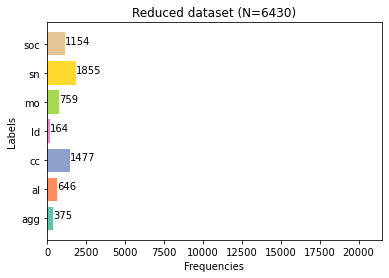

In [43]:
labelcounts = pd.DataFrame(df['call_lable'].value_counts())
labelcounts.sort_index(inplace=True)
pal = sns.color_palette("Set2", n_colors=len(labelcounts.index))
plt.barh(labelcounts.index, labelcounts.call_lable.values, color = pal)

for index, value in enumerate(labelcounts.call_lable.values):
    plt.text(value, index, str(value))

plt.title(dftype.capitalize()+' dataset (N='+str(df.shape[0])+')')
plt.ylabel('Labels')
plt.xlabel('Frequencies')
plt.xlim(0,21500)
#plt.show()
outpath = os.path.join(os.path.sep, FIGURES, "labelcounts_"+dftype+".png")
plt.savefig(outpath, facecolor='w')
print("Saved as: ", outpath)

In [44]:
df.to_pickle(os.path.join(os.path.sep, DATA, "df_focal_reduced.pkl"))

#### Create a completely balanced dataset

In [45]:
labelcounts = pd.DataFrame(df['call_lable'].value_counts())
class_size = np.min(labelcounts.call_lable.values)

subsets = []
for label, num in zip(labelcounts.index, labelcounts.call_lable.values):
    print(label, ":", num, ":", class_size/num)
    subsets.append(df[df.call_lable == label].sample(frac=(class_size/num), replace=False, random_state=1))

df = pd.concat(subsets, axis=0)
dftype = 'balanced'

sn : 1855 : 0.08840970350404313
cc : 1477 : 0.11103588354773189
soc : 1154 : 0.14211438474870017
mo : 759 : 0.2160737812911726
al : 646 : 0.25386996904024767
agg : 375 : 0.43733333333333335
ld : 164 : 1.0


Saved as:  /home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/labelcounts_balanced.png


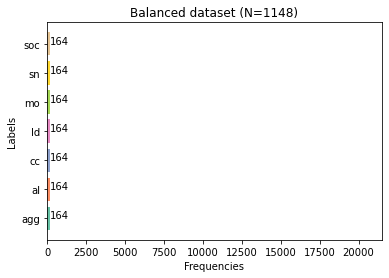

In [46]:
labelcounts = pd.DataFrame(df['call_lable'].value_counts())
labelcounts.sort_index(inplace=True)
pal = sns.color_palette("Set2", n_colors=len(labelcounts.index))
plt.barh(labelcounts.index, labelcounts.call_lable.values, color = pal)

for index, value in enumerate(labelcounts.call_lable.values):
    plt.text(value, index, str(value))

plt.title(dftype.capitalize()+' dataset (N='+str(df.shape[0])+')')
plt.ylabel('Labels')
plt.xlabel('Frequencies')
plt.xlim(0,21500)
#plt.show()
outpath = os.path.join(os.path.sep, FIGURES, "labelcounts_"+dftype+".png")
plt.savefig(outpath, facecolor='w')
print("Saved as: ", outpath)

In [47]:
df.to_pickle(os.path.join(os.path.sep, DATA, "df_focal_balanced.pkl"))